<a href="https://colab.research.google.com/github/nptikiran/Python-program/blob/main/chi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square Test of independant

In [ ]:
import pandas as pd
import scipy.stats as stats

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [ ]:
cars = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cars.csv')

ob_frq = pd.crosstab(cars.Type, cars.Origin) # observed frequency
ob_frq

Origin,Asia,Europe,USA
Type,,,
Hybrid,3,0,0
SUV,25,10,25
Sedan,94,78,90
Sports,17,23,9
Truck,8,0,16
Wagon,11,12,7


In [ ]:
chi_square,p_value,df,expected_frq = stats.chi2_contingency(ob_frq)
p_value # from p_value we reject null means completely dependant each other

9.605826506481587e-05

In [ ]:
# As they are dependant on each other ,next we go for CO-variance ,corelation

from sklearn.datasets import load_boston
data = load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(data.DESCR)

In [ ]:
data.data.shape

(506, 13)

In [ ]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['MEDV'] = data.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Correlation

ERROR! Session/line number was not unique in database. History logging moved to new session 64


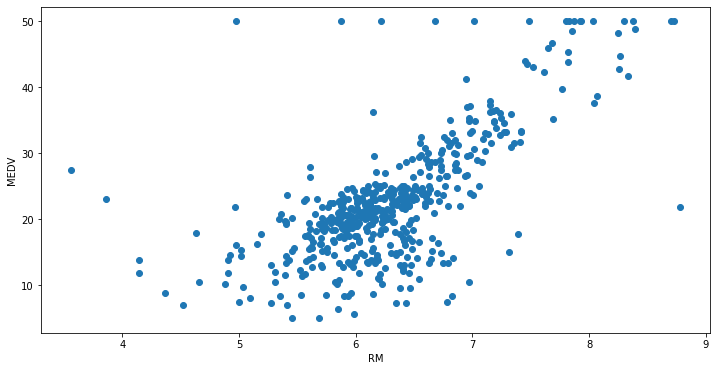

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(boston.RM, boston.MEDV)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show();


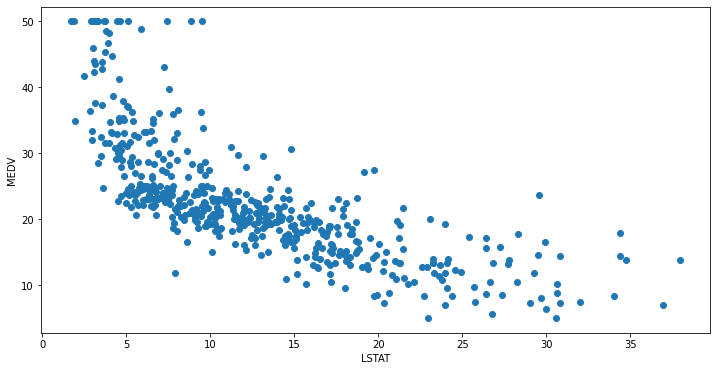

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(boston.LSTAT, boston.MEDV)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show();

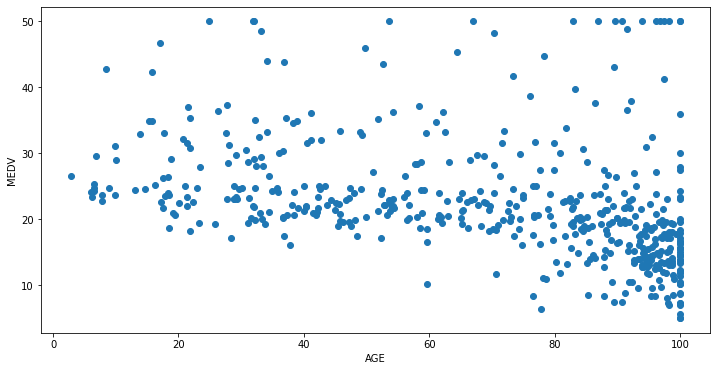

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(boston.AGE, boston.MEDV)
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show();

In [ ]:
import seaborn as sns

sns.pairplot(boston) #plot of all variable with all variables.digonal graph is giving distribution
plt.savefig('pairplot.png')# to save the file at perticular location
plt.show();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:
boston.MEDV.corr(boston.RM)

0.6953599470715393

In [ ]:
boston.MEDV.corr(boston.LSTAT)

-0.7376627261740151

In [ ]:
boston.MEDV.corr(boston.AGE)

-0.37695456500459623

In [ ]:
boston.corr()  # full correlation metrics for data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
boston.CHAS = boston.CHAS.astype('object')  # change the datatype of variable

In [ ]:
corr = boston.corr()
import numpy as np
m =np.ones_like(corr)                       # Create matrics fill with 'o' & '1' 
m[np.tril_indices_from(m)]=0                

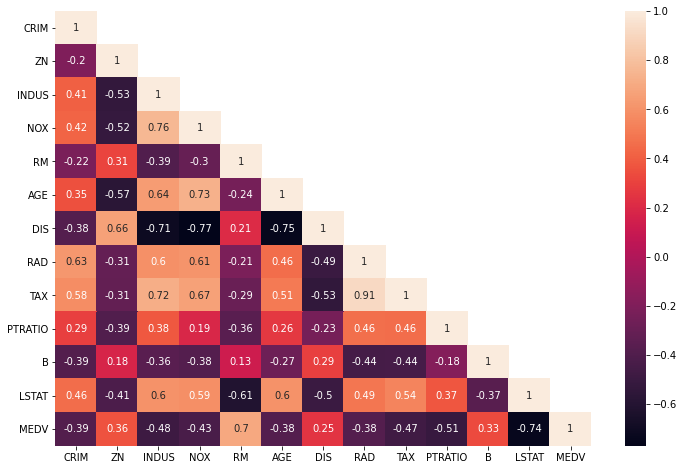

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, mask = m)
plt.show();